In [1]:
%matplotlib notebook
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

#Path to the scripts shared troughout phases
parent_path = os.path.abspath('')
path_common =  '/'.join(parent_path.split('/')[:-1])
save_path = os.path.join(parent_path, 'Results')
if(not os.path.exists(save_path)):
    os.makedirs(save_path)

In [2]:
def extract(folder_name):
    basis_path = os.path.join(parent_path, folder_name)
    losses_step_tr = []
    losses_step_te = []
    losses_step_va = []
    losses_roll_tr = []
    losses_roll_te = []
    losses_roll_va = []
    error_roll_pos = []
    iterations = []
    
    
    for folder in os.listdir(basis_path):
        if not folder == ".ipynb_checkpoints" and not folder == "Training.ipynb":
            path_to_saves = os.path.join(basis_path, folder,'Saves')
            itera = np.load(os.path.join(path_to_saves,'iterations.npy'))
                
            if len(iterations) == 0:
                iterations = np.load(os.path.join(path_to_saves,'iterations.npy'))
            else: 
                iterations = np.intersect1d(iterations, itera)
            
            iter_len = len(itera)
            if not iter_len == 100:
                losses_step_tr.append(np.array(np.load(os.path.join(path_to_saves,'losses_step_tr.npy')))[0:iter_len:2])
                losses_step_te.append(np.array(np.load(os.path.join(path_to_saves,'losses_step_te.npy')))[0:iter_len:2])
                losses_step_va.append(np.array(np.load(os.path.join(path_to_saves,'losses_step_va.npy')))[0:iter_len:2])
                losses_roll_tr.append(np.array(np.load(os.path.join(path_to_saves,'losses_roll_tr.npy')))[0:iter_len:2])
                losses_roll_te.append(np.array(np.load(os.path.join(path_to_saves,'losses_roll_te.npy')))[0:iter_len:2])
                losses_roll_va.append(np.array(np.load(os.path.join(path_to_saves,'losses_roll_va.npy')))[0:iter_len:2])
            else:
                losses_step_tr.append(np.array(np.load(os.path.join(path_to_saves,'losses_step_tr.npy'))))
                losses_step_te.append(np.array(np.load(os.path.join(path_to_saves,'losses_step_te.npy'))))
                losses_step_va.append(np.array(np.load(os.path.join(path_to_saves,'losses_step_va.npy'))))
                losses_roll_tr.append(np.array(np.load(os.path.join(path_to_saves,'losses_roll_tr.npy'))))
                losses_roll_te.append(np.array(np.load(os.path.join(path_to_saves,'losses_roll_te.npy'))))
                losses_roll_va.append(np.array(np.load(os.path.join(path_to_saves,'losses_roll_va.npy'))))
            
            
            error_roll_pos.append(np.load(os.path.join(path_to_saves,'rollout_error_position.npy')))
    
    
    losses_step_te = np.array(losses_step_te)
    losses_step_tr = np.array(losses_step_tr)
    losses_step_va = np.array(losses_step_va)
    
    losses_roll_te = np.array(losses_roll_te)
    losses_roll_tr = np.array(losses_roll_tr)
    losses_roll_va = np.array(losses_roll_va)
    
    #error_roll_pos = np.array(error_roll_pos)
    
    iterations = np.array(iterations)
    
    data = {
        'losses_step_te':losses_step_te,
        'losses_step_tr':losses_step_tr,
        'losses_step_va':losses_step_va,
        'losses_rollout_te':losses_roll_te,
        'losses_rollout_tr':losses_roll_tr,
        'losses_rollout_va':losses_roll_va,
        'error_roll_pos':error_roll_pos,
        'iterations':iterations,}
    
    return data
    

In [3]:
data_1 = extract('O-Pos')
data_2 = extract('O-Vel')

<IPython.core.display.Javascript object>


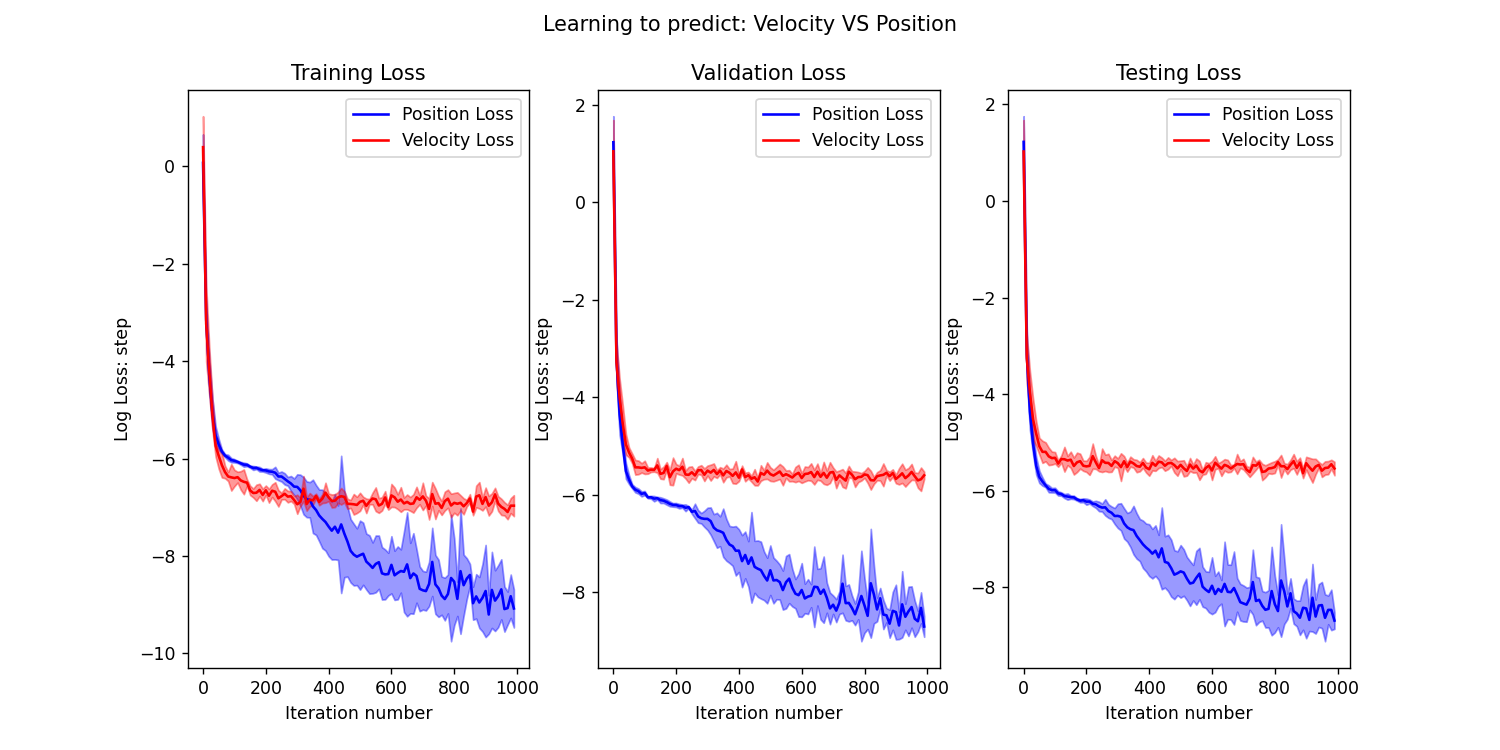

In [5]:
TITLE = "Learning to predict: Velocity VS Position"
LOSS = "step"
TR_TITLE = "Training Loss"
VA_TITLE = "Validation Loss"
TE_TITLE = "Testing Loss"

LABEL_1 = "Position Loss"
LABEL_2 = "Velocity Loss"


x = data_1['iterations']
y1 = np.mean(np.log(data_1['losses_'+str(LOSS)+'_tr']),axis=0)
e1 = np.std(np.log(data_1['losses_'+str(LOSS)+'_tr']),axis=0)
y2 = np.mean(np.log(data_2['losses_'+str(LOSS)+'_tr']),axis=0)
e2 = np.std(np.log(data_2['losses_'+str(LOSS)+'_tr']),axis=0)

plt.close('all')
fig = plt.figure(1, figsize=(12, 6))
fig.clf()
ax = fig.add_subplot(1, 3, 1)
ax.plot(x, y1, "b",label = LABEL_1)
plt.fill_between(x, y1-e1, y1+e1, color = "b", alpha=0.4)
ax.plot(x, y2, "r",label = LABEL_2)
plt.fill_between(x, y2-e2, y2+e2, color = "r", alpha=0.4)
ax.legend()
ax.set_title(TR_TITLE)
ax.set_xlabel("Iteration number")
ax.set_ylabel("Log Loss: "+LOSS)


x = data_1['iterations']
y1 = np.mean(np.log(data_1['losses_'+str(LOSS)+'_va']),axis=0)
e1 = np.std(np.log(data_1['losses_'+str(LOSS)+'_va']),axis=0)
y2 = np.mean(np.log(data_2['losses_'+str(LOSS)+'_va']),axis=0)
e2 = np.std(np.log(data_2['losses_'+str(LOSS)+'_va']),axis=0)

ax = fig.add_subplot(1, 3, 2)
ax.plot(x, y1, "b",label = LABEL_1)
plt.fill_between(x, y1-e1, y1+e1, color = "b", alpha=0.4)
ax.plot(x, y2, "r",label = LABEL_2)
plt.fill_between(x, y2-e2, y2+e2, color = "r", alpha=0.4)
ax.legend()
ax.set_title(VA_TITLE)
ax.set_xlabel("Iteration number")
ax.set_ylabel("Log Loss: "+LOSS)


x = data_1['iterations']
y1 = np.mean(np.log(data_1['losses_'+str(LOSS)+'_te']),axis=0)
e1 = np.std(np.log(data_1['losses_'+str(LOSS)+'_te']),axis=0)
y2 = np.mean(np.log(data_2['losses_'+str(LOSS)+'_te']),axis=0)
e2 = np.std(np.log(data_2['losses_'+str(LOSS)+'_te']),axis=0)

ax = fig.add_subplot(1, 3, 3)
ax.plot(x, y1, "b",label = LABEL_1)
plt.fill_between(x, y1-e1, y1+e1, color = "b", alpha=0.4)
ax.plot(x, y2, "r",label = LABEL_2)
plt.fill_between(x, y2-e2, y2+e2, color = "r", alpha=0.4)
ax.legend()
ax.set_title(TE_TITLE)
ax.set_xlabel("Iteration number")
ax.set_ylabel("Log Loss: "+LOSS)

plt.suptitle(TITLE)

fig.savefig(os.path.join(save_path,"Experiment1Rollout-Rollout"))

plt.show()

<IPython.core.display.Javascript object>


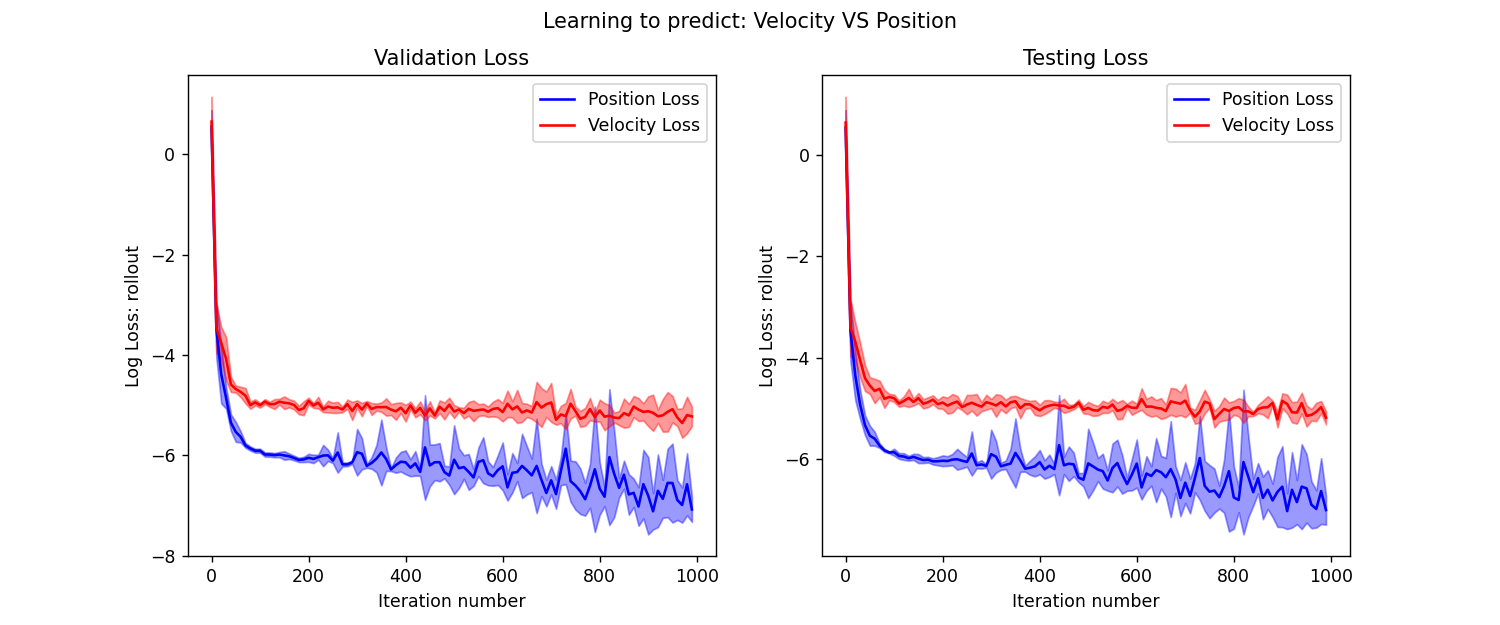

In [12]:
TITLE = "Learning to predict: Velocity VS Position"
LOSS = "rollout"
TR_TITLE = "Training Loss"
VA_TITLE = "Validation Loss"
TE_TITLE = "Testing Loss"

LABEL_1 = "Position Loss"
LABEL_2 = "Velocity Loss"


plt.close('all')
fig = plt.figure(1, figsize=(12, 5))
fig.clf()


x = data_1['iterations']
y1 = np.mean(np.log(data_1['losses_'+str(LOSS)+'_va']),axis=0)
e1 = np.std(np.log(data_1['losses_'+str(LOSS)+'_va']),axis=0)
y2 = np.mean(np.log(data_2['losses_'+str(LOSS)+'_va']),axis=0)
e2 = np.std(np.log(data_2['losses_'+str(LOSS)+'_va']),axis=0)

ax = fig.add_subplot(1, 2, 1)
ax.plot(x, y1, "b",label = LABEL_1)
plt.fill_between(x, y1-e1, y1+e1, color = "b", alpha=0.4)
ax.plot(x, y2, "r",label = LABEL_2)
plt.fill_between(x, y2-e2, y2+e2, color = "r", alpha=0.4)
ax.legend()
ax.set_title(VA_TITLE)
ax.set_xlabel("Iteration number")
ax.set_ylabel("Log Loss: "+LOSS)


x = data_1['iterations']
y1 = np.mean(np.log(data_1['losses_'+str(LOSS)+'_te']),axis=0)
e1 = np.std(np.log(data_1['losses_'+str(LOSS)+'_te']),axis=0)
y2 = np.mean(np.log(data_2['losses_'+str(LOSS)+'_te']),axis=0)
e2 = np.std(np.log(data_2['losses_'+str(LOSS)+'_te']),axis=0)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x, y1, "b",label = LABEL_1)
plt.fill_between(x, y1-e1, y1+e1, color = "b", alpha=0.4)
ax.plot(x, y2, "r",label = LABEL_2)
plt.fill_between(x, y2-e2, y2+e2, color = "r", alpha=0.4)
ax.legend()
ax.set_title(TE_TITLE)
ax.set_xlabel("Iteration number")
ax.set_ylabel("Log Loss: "+LOSS)

plt.suptitle(TITLE)

fig.savefig(os.path.join(save_path, LOSS+"TrainingPlot"))

plt.show()

In [42]:
def rollout_error(data):
    ys = []
    for t in data['error_roll_pos']:
        ys.append(np.mean(t,axis=-1).squeeze())
    return np.array(ys)

In [43]:
ys_1 = rollout_error(data_1)
ys_2 = rollout_error(data_2)

<IPython.core.display.Javascript object>


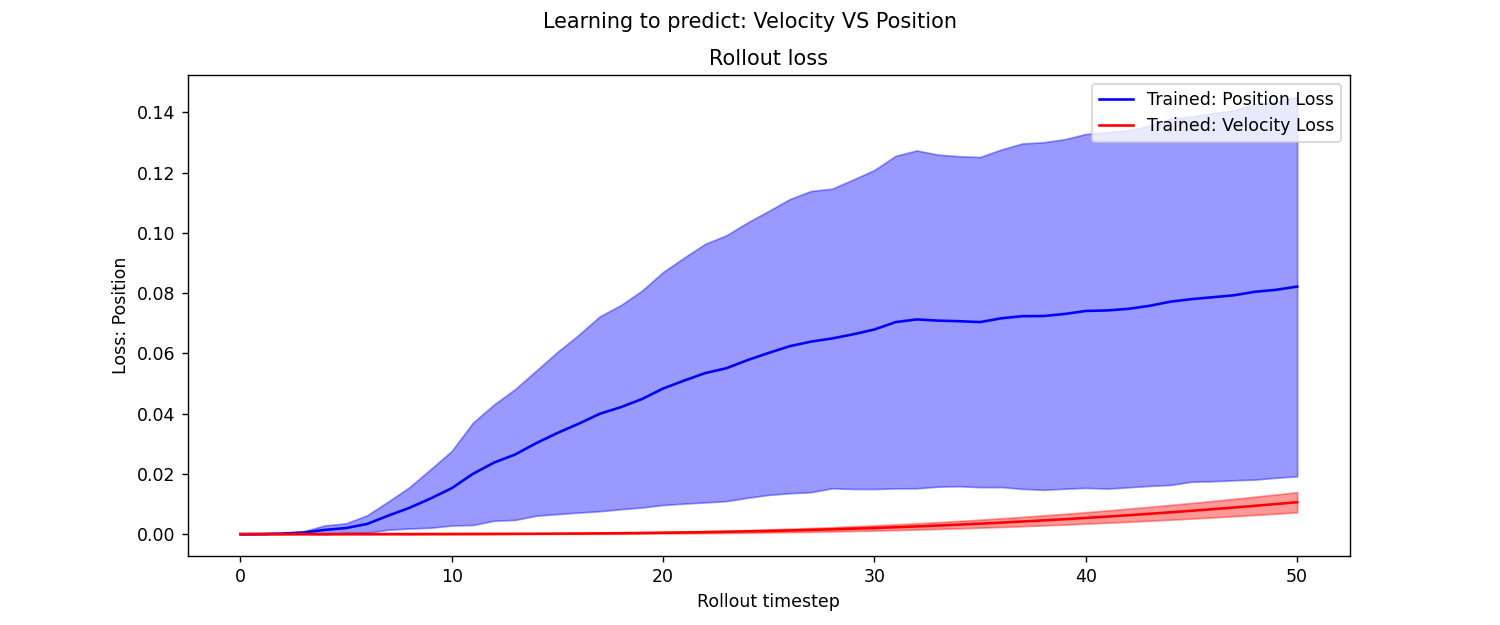

In [48]:
plt.close('all')
fig = plt.figure(1, figsize=(12, 5))
fig.clf()

x = list(range(ys_1.shape[1]))
y1 = np.mean(ys_1,axis=0)
e1 = np.std(ys_1,axis=0)
y2 = np.mean(ys_2,axis=0)
e2 = np.std(ys_2,axis=0)

ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y1, "b",label = "Trained: Position Loss")
plt.fill_between(x, y1-e1, y1+e1, color = "b", alpha=0.4)
ax.plot(x, y2, "r",label = "Trained: Velocity Loss")
plt.fill_between(x, y2-e2, y2+e2, color = "r", alpha=0.4)
ax.legend()
ax.set_title("Rollout loss")
ax.set_xlabel("Rollout timestep")
ax.set_ylabel("Loss: Position")

plt.suptitle(TITLE)
fig.savefig(os.path.join(save_path, LOSS+"RolloutPlot"))

plt.show()